In [1]:
from PIL import Image
import numpy as np
from random import sample
import numpy

# Wczytanie obrazu sekretu

In [2]:
secret = np.array(Image.open('secret.png').convert('LA'))

In [3]:
secret.shape

(100, 100, 2)

In [4]:
w, h = secret.shape[:2]

# Przygotowanie macierzy kolorów (C0 - "biały", C1 - "czarny")

In [5]:
# 1 - czarny, 0 - przezroczysty

In [6]:
C0 = [
    [
        [[0,0],
         [1,1]],
        [[0,0],
         [1,1]]
    ],
    [
        [[1,1],
         [0,0]],
        [[1,1],
         [0,0]]
    ],
    [
        [[0,1],
         [0,1]],
        [[0,1],
         [0,1]]
    ],
    [
        [[1,0],
         [1,0]],
        [[1,0],
         [1,0]]
    ],
    [
        [[0,1],
         [1,0]],
        [[0,1],
         [1,0]]
    ],
    [
        [[1,0],
         [0,1]],
        [[1,0],
         [0,1]]
    ]
]

In [7]:
C1 = [
    [
        [[0,0],
         [1,1]],
        [[1,1],
         [0,0]]
    ],
    [
        [[1,1],
         [0,0]],
        [[0,0],
         [1,1]]
    ],
    [
        [[0,1],
         [0,1]],
        [[1,0],
         [1,0]]
    ],
    [
        [[1,0],
         [1,0]],
        [[0,1],
         [0,1]]
    ],
    [
        [[0,1],
         [1,0]],
        [[1,0],
         [0,1]]
    ],
    [
        [[1,0],
         [0,1]],
        [[0,1],
         [1,0]]
    ]
]

# Przygotowanie udziałów

In [8]:
s1 = np.zeros(shape=(w*2,h*2,2), dtype=np.uint8)

In [9]:
s2 = np.zeros(shape=(w*2,h*2,2), dtype=np.uint8)

In [10]:
for x in range(w):
    for y in range(h):
        # sprawdzenie czy piksel jest przezroczysty
        is_transparent = bool(secret[x][y][1] == 0)
        # wybór tablicy "białych" lub "czarnych" subpikseli zależnie od tego czy piksel jest przezroczysty
        subpixels_pair = sample(C0 if is_transparent else C1, 1)[0]
        # dla każdego piksela z macierzy subpikseli ustawiamy piksele w macierzach udziałów
        for xs in range(2):
            for ys in range(2):
                # maksymalna jasność piksela (kanał przezroczystości) jeśli wartość subpiksela = 1 a w przeciwnym razie minimalna
                s1[2 * x + xs][2 * y + ys][1] = 255 if subpixels_pair[0][xs][ys] == 1 else 0
                s2[2 * x + xs][2 * y + ys][1] = 255 if subpixels_pair[1][xs][ys] == 1 else 0

In [11]:
s1 = Image.fromarray(s1, 'LA')

In [12]:
s2 = Image.fromarray(s2, 'LA')

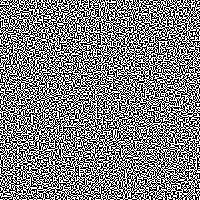

In [13]:
s1

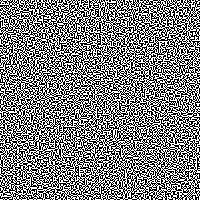

In [14]:
s2

# Złączanie udziałów aby zobaczyć wynik

In [15]:
img2 = Image.new("LA", (2*w, 2*h), "white")

In [16]:
img2.paste(s1, (0, 0), s1)
img2.paste(s2, (0, 0), s2)

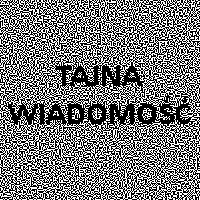

In [17]:
img2

# Zapisanie udziałów na dysku

In [18]:
s1.save("s1.png")

In [19]:
s2.save("s2.png")